In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prec_almeria = pd.read_csv('../data/tablas_análisis/almeria_p_mes_total.csv')
prec_coruna = pd.read_csv('../data/tablas_análisis/a_coruna_p_mes_total.csv')
prec_huelva = pd.read_csv('../data/tablas_análisis/huelva_p_mes_total.csv')
prec_girona = pd.read_csv('../data/tablas_análisis/girona_p_mes_total.csv')
prec_cadiz = pd.read_csv('../data/tablas_análisis/cadiz_p_mes_total.csv')
prec_total = pd.read_csv('../data/tablas_análisis/provincias2020_p_mes_total.csv')
explotaciones = pd.read_csv('../data/tablas_análisis/explotaciones.csv')

Vamos a ver la evolución de las precipitaciones en cada provincia de nuestra muestra

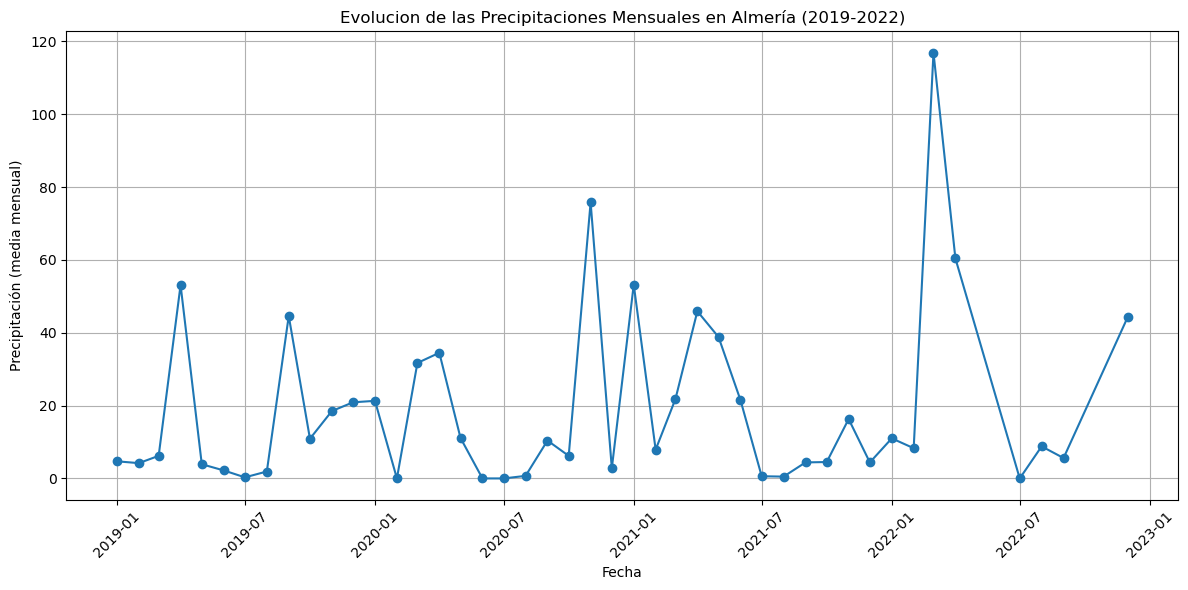

In [3]:
# Convirtiendo la columna de fecha a un tipo de dato de fecha
prec_almeria['fecha'] = pd.to_datetime(prec_almeria['fecha'])

# Considero que no podemos sustituir los valores nulos, así los ignoramos. 
tabla_filtrada = prec_almeria.dropna(subset=['p_mes'])

# Creando la gráfica
plt.figure(figsize=(12, 6))
plt.plot(tabla_filtrada['fecha'], tabla_filtrada['p_mes'], marker='o')#marker genera el punto. El valor.
plt.title('Evolucion de las Precipitaciones Mensuales en Almería (2019-2022)')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (media mensual)')
plt.grid(True)#opción para que aparezca la cuadrícula
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

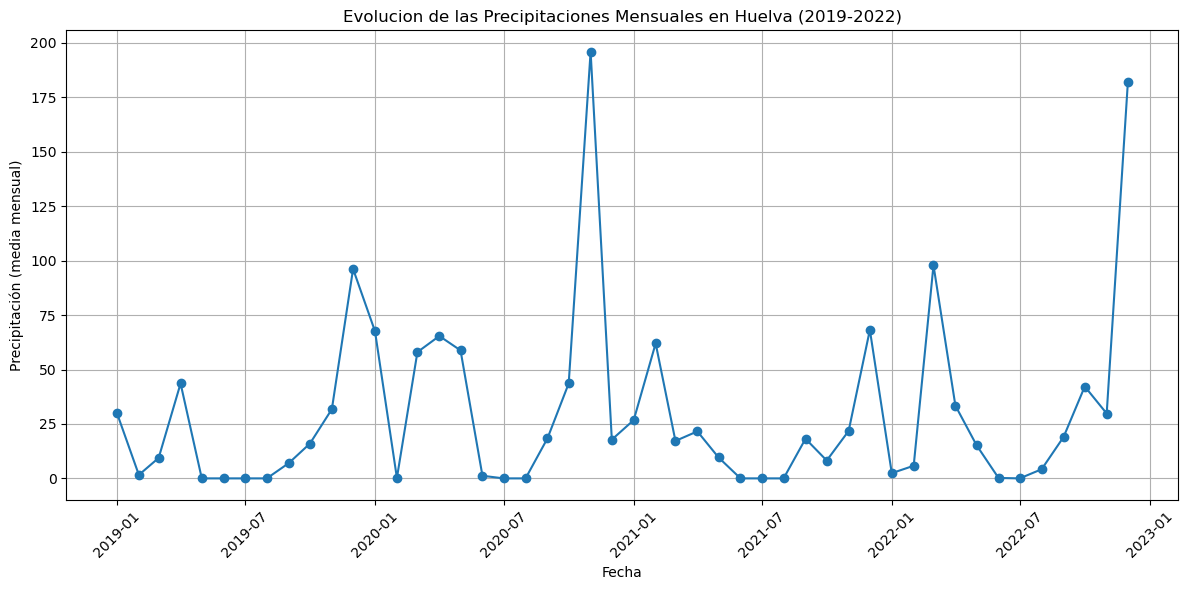

In [4]:
# Convirtiendo la columna de fecha a un tipo de dato de fecha
prec_huelva['fecha'] = pd.to_datetime(prec_huelva['fecha'])

# Considero que no podemos sustituir los valores nulos, así los ignoramos. 
tabla_filtrada = prec_huelva.dropna(subset=['p_mes'])

# Creando la gráfica
plt.figure(figsize=(12, 6))
plt.plot(tabla_filtrada['fecha'], tabla_filtrada['p_mes'], marker='o')
plt.title('Evolucion de las Precipitaciones Mensuales en Huelva (2019-2022)')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (media mensual)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

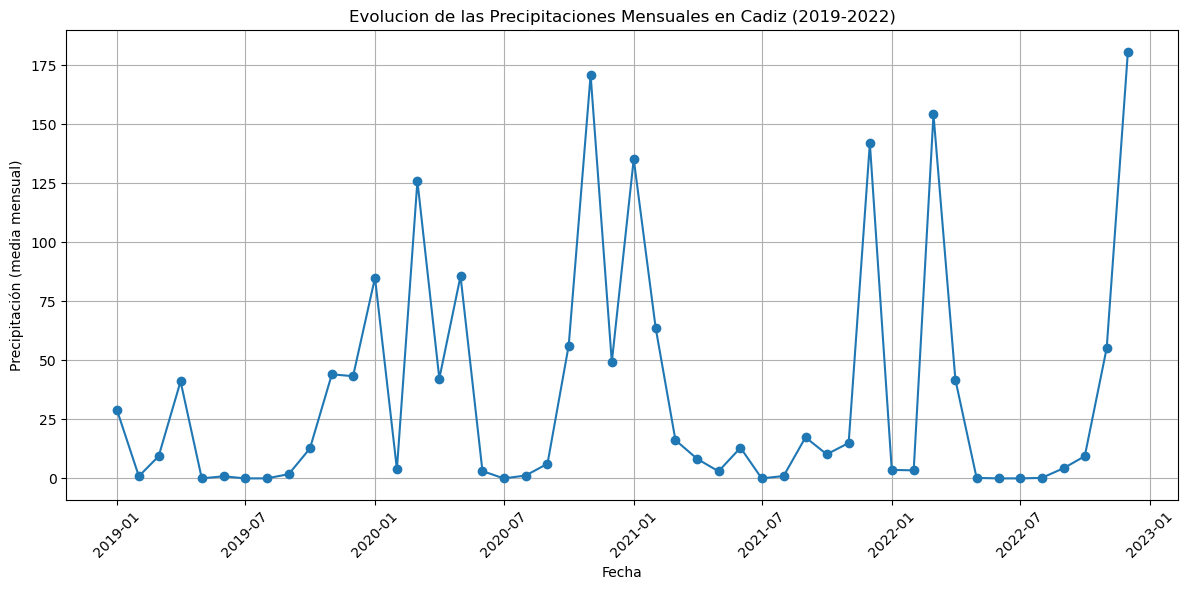

In [5]:
# Convirtiendo la columna de fecha a un tipo de dato de fecha
prec_cadiz['fecha'] = pd.to_datetime(prec_cadiz['fecha'])

# Considero que no podemos sustituir los valores nulos, así los ignoramos. 
tabla_filtrada = prec_cadiz.dropna(subset=['p_mes'])

# Creando la gráfica
plt.figure(figsize=(12, 6))
plt.plot(tabla_filtrada['fecha'], tabla_filtrada['p_mes'], marker='o')
plt.title('Evolucion de las Precipitaciones Mensuales en Cadiz (2019-2022)')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (media mensual)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

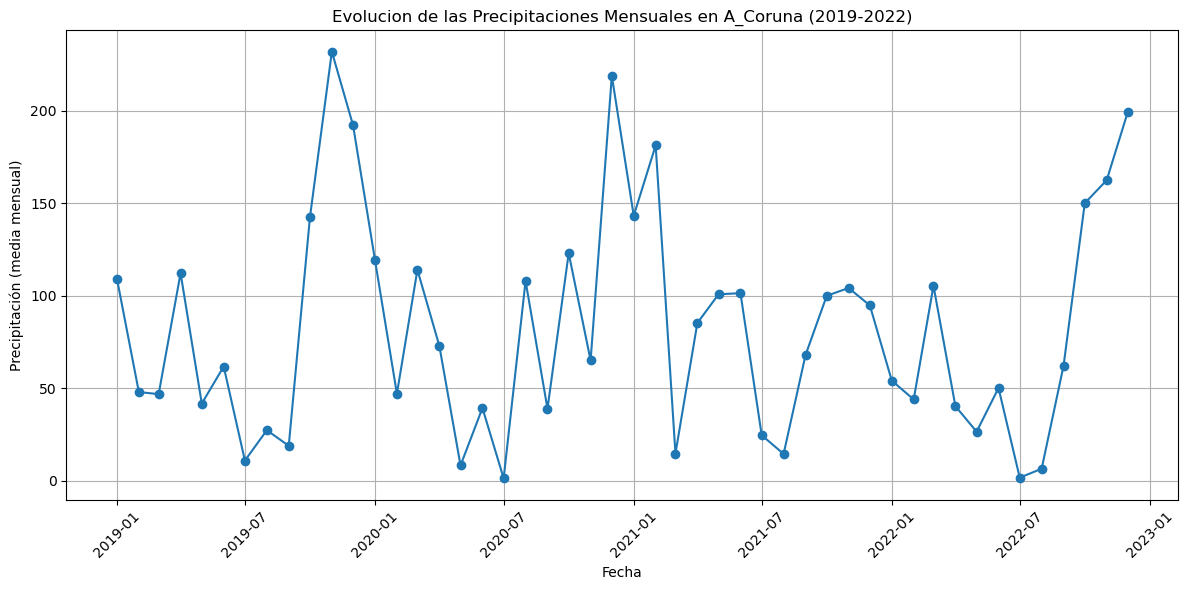

In [6]:
# Convirtiendo la columna de fecha a un tipo de dato de fecha
prec_coruna['fecha'] = pd.to_datetime(prec_coruna['fecha'])

# Considero que no podemos sustituir los valores nulos, así los ignoramos. 
tabla_filtrada = prec_coruna.dropna(subset=['p_mes'])

# Creando la gráfica
plt.figure(figsize=(12, 6))
plt.plot(tabla_filtrada['fecha'], tabla_filtrada['p_mes'], marker='o')
plt.title('Evolucion de las Precipitaciones Mensuales en A_Coruna (2019-2022)')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (media mensual)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

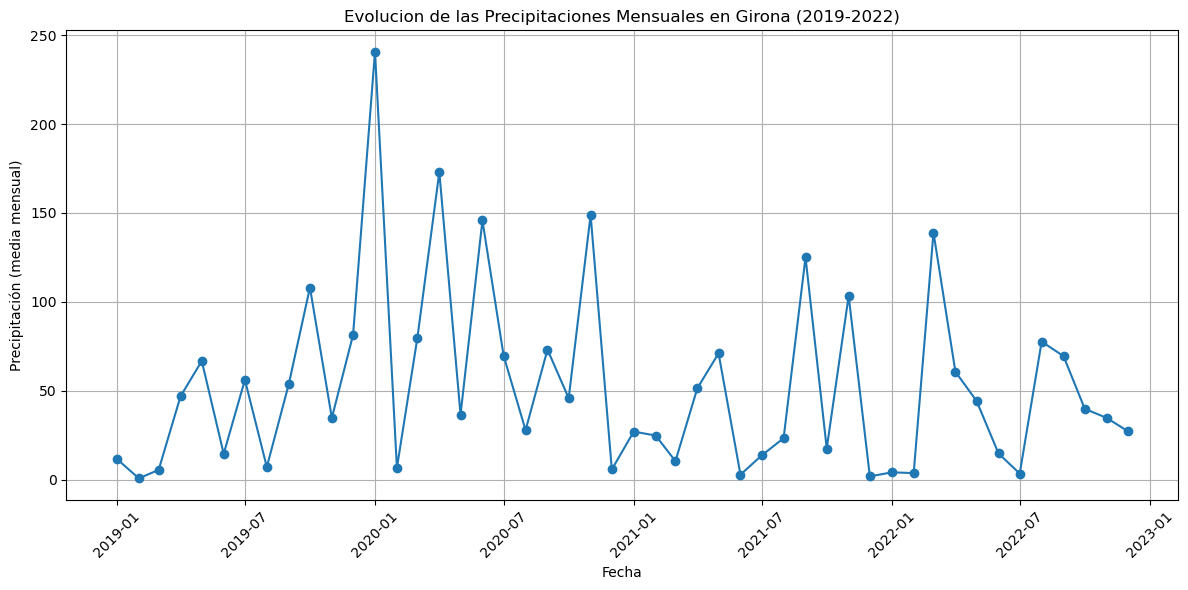

In [7]:
# Convirtiendo la columna de fecha a un tipo de dato de fecha
prec_girona['fecha'] = pd.to_datetime(prec_girona['fecha'])

# Considero que no podemos sustituir los valores nulos, así los ignoramos. 
tabla_filtrada = prec_girona.dropna(subset=['p_mes'])

# Creando la gráfica
plt.figure(figsize=(12, 6))
plt.plot(tabla_filtrada['fecha'], tabla_filtrada['p_mes'], marker='o')
plt.title('Evolucion de las Precipitaciones Mensuales en Girona (2019-2022)')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (media mensual)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Vamos ahora a centrarnos en el año 2020. Comparamos las precipitaciones de todas las provincias. Luego veremos la relación con el tipo de cultivo existente en cada una de ellas.

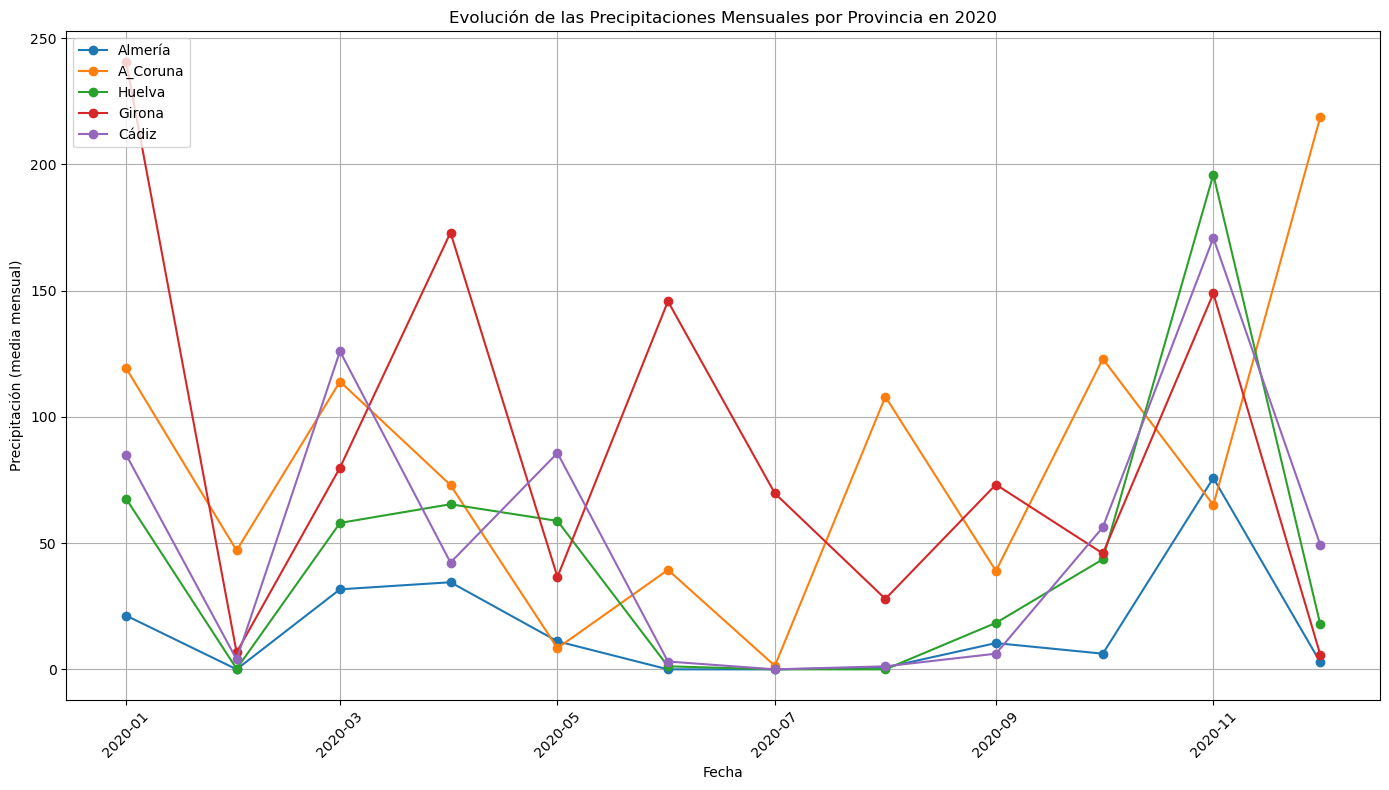

In [8]:
# Convirtiendo la columna de fecha a un tipo de dato de fecha
prec_total['fecha'] = pd.to_datetime(prec_total['fecha'], format='%Y-%m')

# Creando una figura para la gráfica
plt.figure(figsize=(14, 8))

# Iterando a través de cada provincia y graficando sus datos
for provincia in prec_total['provincia'].unique():
    provincia_data = prec_total[prec_total['provincia'] == provincia]
    plt.plot(provincia_data['fecha'], provincia_data['p_mes'], marker='o', label=provincia)

plt.title('Evolución de las Precipitaciones Mensuales por Provincia en 2020')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (media mensual)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Llama la atención la media de precipitaciones en Almería. Es mucho más baja que el resto de provincias, siendo ligeramente superior la media en Girona. Vamos a ver ahora el tipo de explotación que tienen Girona y Almería.

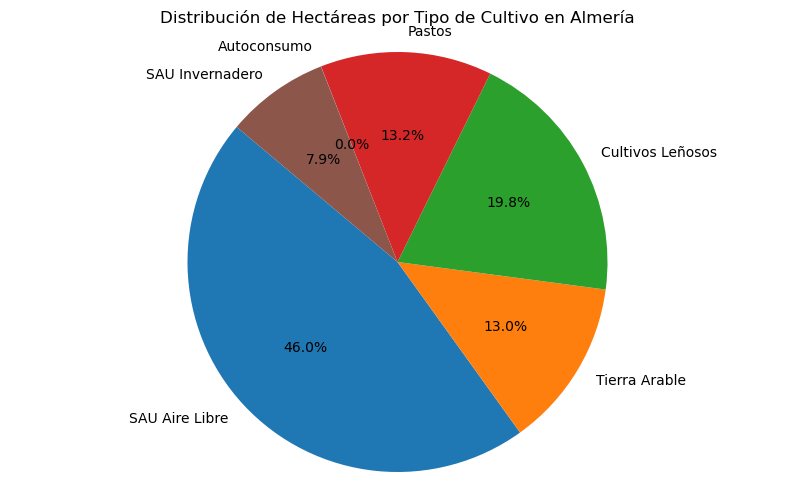

In [11]:
# Filtro los datos para la provincia de Almería
almeria = explotaciones[explotaciones['provincia'] == 'almeria']

# Extrayendo las hectáreas de cada tipo de cultivo
dict_hectareas = {
    'SAU Aire Libre': almeria['sau_aire_libre'].values[0],
    'Tierra Arable': almeria['tierra_arable'].values[0],
    'Cultivos Leñosos': almeria['cultivos_lenyosos'].values[0],
    'Pastos': almeria['pastos'].values[0],
    'Autoconsumo': almeria['autoconsumo'].values[0],
    'SAU Invernadero': almeria['sau_invernadero'].values[0]
}

# Creando el diagrama sectorial
plt.figure(figsize=(10, 6))
plt.pie(dict_hectareas.values(), labels=dict_hectareas.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Hectáreas por Tipo de Cultivo en Almería')
plt.axis('equal')  # Asegurando que el gráfico sea un círculo
plt.show()


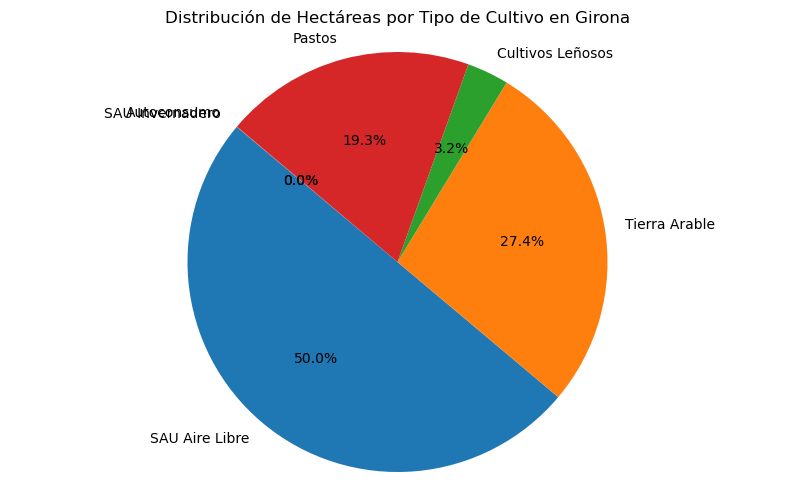

In [12]:
# Filtro los datos para la provincia de Girona
girona = explotaciones[explotaciones['provincia'] == 'girona']

# Extrayendo las hectáreas de cada tipo de cultivo
dict_hectareas = {
    'SAU Aire Libre': girona['sau_aire_libre'].values[0],
    'Tierra Arable': girona['tierra_arable'].values[0],
    'Cultivos Leñosos': girona['cultivos_lenyosos'].values[0],
    'Pastos': girona['pastos'].values[0],
    'Autoconsumo': girona['autoconsumo'].values[0],
    'SAU Invernadero': girona['sau_invernadero'].values[0]
}

# Creando el diagrama sectorial
plt.figure(figsize=(10, 6))
plt.pie(dict_hectareas.values(), labels=dict_hectareas.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Hectáreas por Tipo de Cultivo en Girona')
plt.axis('equal')  # Asegurando que el gráfico sea un círculo
plt.show()


In [13]:
explotaciones.head()

,codigo_provincia,provincia,sau_aire_libre,sau_aire_libre_uds,tierra_arable,tierra_arable_uds,cultivos_lenyosos,cultivos_lenyosos_uds,pastos,pastos_uds,autoconsumo,autoconsumo_uds,sau_invernadero,sau_invernadero_uds
0,13385,almeria,173438.78,11690,48938.64,3955,74666.68,9442,49783.24,3840,50.22,1765,29942.22,16256
1,13386,cadiz,447376.00,10047,248128.66,5810,45274.71,5355,153949.17,2770,23.46,831,586.23,820
2,13424,a_coruna,169406.51,20792,82744.98,16930,1425.96,3176,84960.61,17795,274.96,9608,190.56,703
3,13389,huelva,372209.91,10737,85255.61,4730,63551.47,7430,223373.80,3473,29.03,978,11868.19,1500
4,13416,girona,166100.88,5001,91143.59,3898,10699.07,1959,64227.63,1410,30.59,1208,101.04,116
